In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read parquet File

mydataframe = pd.read_parquet('schools_ccd_lea_enrollment_df_pyarrow.parquet.gzip', engine='pyarrow')

mydataframe

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
0,1999,100002,1,3,1,1,0.0,Alabama,3,White,Male
1,1999,100002,1,3,1,2,0.0,Alabama,3,White,Female
2,1999,100002,1,3,1,99,0.0,Alabama,3,White,Total
3,1999,100002,1,3,2,1,0.0,Alabama,3,Black,Male
4,1999,100002,1,3,2,2,0.0,Alabama,3,Black,Female
...,...,...,...,...,...,...,...,...,...,...,...
102513450,1997,7800030,78,99,2,99,18744.0,Virgin Islands of the US,Total,Black,Total
102513451,1997,7800030,78,99,3,99,3113.0,Virgin Islands of the US,Total,Hispanic,Total
102513452,1997,7800030,78,99,4,99,77.0,Virgin Islands of the US,Total,Asian,Total
102513453,1997,7800030,78,99,5,99,10.0,Virgin Islands of the US,Total,American Indian or Alaska Native,Total


In [4]:
import pyarrow.parquet as pq
mydf = pq.read_table('schools_ccd_lea_enrollment_df_pyarrow.parquet.gzip').to_pandas()
mydf

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
0,1999,100002,1,3,1,1,0.0,Alabama,3,White,Male
1,1999,100002,1,3,1,2,0.0,Alabama,3,White,Female
2,1999,100002,1,3,1,99,0.0,Alabama,3,White,Total
3,1999,100002,1,3,2,1,0.0,Alabama,3,Black,Male
4,1999,100002,1,3,2,2,0.0,Alabama,3,Black,Female
...,...,...,...,...,...,...,...,...,...,...,...
102513450,1997,7800030,78,99,2,99,18744.0,Virgin Islands of the US,Total,Black,Total
102513451,1997,7800030,78,99,3,99,3113.0,Virgin Islands of the US,Total,Hispanic,Total
102513452,1997,7800030,78,99,4,99,77.0,Virgin Islands of the US,Total,Asian,Total
102513453,1997,7800030,78,99,5,99,10.0,Virgin Islands of the US,Total,American Indian or Alaska Native,Total


## School Districts Data


In [3]:
# Creates Code dictionaries to help add human readable Columns to dataframe
value_mappings = pd.read_excel(open('codebook_districts_ccd_enrollment.xls', 'rb'),
              sheet_name='values')

fips_codes = value_mappings[value_mappings["format"] == "fips"].set_index('code').code_label.to_dict()
grade_codes = value_mappings[value_mappings["format"] == "grade"].set_index('code').code_label.to_dict()
race_codes = value_mappings[value_mappings["format"] == "race"].set_index('code').code_label.to_dict()
sex_codes = value_mappings[value_mappings["format"] == "sex"].set_index('code').code_label.to_dict()

grade_codes

{-3: 'Suppressed data',
 -2: 'Not applicable',
 -1: 'Pre-K',
 0: 'Kindergarten',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12',
 13: '13',
 14: 'Adult education',
 15: 'Ungraded',
 99: 'Total',
 999: 'Not specified'}

In [4]:
# Add Value# "State" based on fips code above
mydataframe["state_name"] = mydataframe["fips"].map(fips_codes)
mydataframe["grade_name"] = mydataframe["grade"].map(grade_codes)
mydataframe["race_name"] = mydataframe["race"].map(race_codes)
mydataframe["sex_name"] = mydataframe["sex"].map(sex_codes)

mydataframe

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
0,1999,100002,1,3,1,1,0.0,Alabama,3,White,Male
1,1999,100002,1,3,1,2,0.0,Alabama,3,White,Female
2,1999,100002,1,3,1,99,0.0,Alabama,3,White,Total
3,1999,100002,1,3,2,1,0.0,Alabama,3,Black,Male
4,1999,100002,1,3,2,2,0.0,Alabama,3,Black,Female
...,...,...,...,...,...,...,...,...,...,...,...
102513450,1997,7800030,78,99,2,99,18744.0,Virgin Islands of the US,Total,Black,Total
102513451,1997,7800030,78,99,3,99,3113.0,Virgin Islands of the US,Total,Hispanic,Total
102513452,1997,7800030,78,99,4,99,77.0,Virgin Islands of the US,Total,Asian,Total
102513453,1997,7800030,78,99,5,99,10.0,Virgin Islands of the US,Total,American Indian or Alaska Native,Total


In [5]:
# Filter out only Totals
school_totals_df = mydataframe[(mydataframe.sex == 99) 
    & (mydataframe.race == 99) & (mydataframe.grade == 99)]

school_totals_df.head()

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
431,1999,100005,1,99,99,99,3391.0,Alabama,Total,Total,Total
683,1999,100006,1,99,99,99,7022.0,Alabama,Total,Total,Total
935,1999,100007,1,99,99,99,9508.0,Alabama,Total,Total,Total
1187,1999,100008,1,99,99,99,5816.0,Alabama,Total,Total,Total
1745,1999,100030,1,99,99,99,3601.0,Alabama,Total,Total,Total


In [6]:
school_sum_df = school_totals_df.groupby(['year']).agg({'enrollment': ['sum']}).reset_index()
school_sum_df.head()

,year,enrollment
,,sum
0,1986,40679457.0
1,1987,40706279.0
2,1988,41039846.0
3,1989,41453526.0
4,1990,42095467.0


Text(0, 0.5, 'Students in Millions')

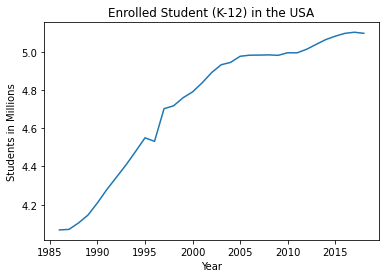

In [8]:
# Line plot showing numbers of studnets per year
# Enrollment in Millions 

plt.plot(school_sum_df.year, school_sum_df.enrollment/ 10000000)
plt.title("Enrolled Student (K-12) in the USA")
plt.xlabel('Year')
plt.ylabel('Students in Millions')

In [7]:
# Enrollments in Texas over time
texas_df = mydataframe[(mydataframe.state_name == "Texas")]
# Filter out only Totals
texas_df_totals_df = texas_df[(texas_df.grade == 99)]

texas_df_totals_df.head()

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
3104549,1999,4800001,48,99,1,1,84.0,Texas,Total,White,Male
3104550,1999,4800001,48,99,1,2,80.0,Texas,Total,White,Female
3104551,1999,4800001,48,99,1,99,164.0,Texas,Total,White,Total
3104552,1999,4800001,48,99,2,1,18.0,Texas,Total,Black,Male
3104553,1999,4800001,48,99,2,2,20.0,Texas,Total,Black,Female
